In [1]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The data consists of the shot log for the NBA season 2016/17

shot = pd.read_csv("Assignment Data/Week 3/NBA shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


In [3]:
shot['shoot_player'].unique()

array(['Kent Bazemore', 'Dwight Howard', 'Kyle Korver', 'Dennis Schroder',
       'Paul Millsap', 'Tim Hardaway Jr.', 'Mike Muscala',
       'Malcolm Delaney', 'Thabo Sefolosha', 'Kris Humphries',
       "DeAndre' Bembry", 'Taurean Prince', 'Walter Tavares',
       'Ryan Kelly', 'Mike Scott', 'Mike Dunleavy', 'Gary Neal',
       'Lamar Patterson', 'Ersan Ilyasova', 'Jose Calderon',
       'Jae Crowder', 'Al Horford', 'Avery Bradley', 'Isaiah Thomas',
       'Jaylen Brown', 'Terry Rozier', 'Amir Johnson', 'Jonas Jerebko',
       'Gerald Green', 'Tyler Zeller', 'Jordan Mickey', 'Marcus Smart',
       'James Young', 'Demetrius Jackson', 'Kelly Olynyk', 'Brook Lopez',
       'Bojan Bogdanovic', 'Jeremy Lin', 'Rondae Hollis-Jefferson',
       'Joe Harris', 'Luis Scola', 'Sean Kilpatrick', 'Justin Hamilton',
       'Greivis Vasquez', 'Trevor Booker', 'Chris McCullough',
       'Anthony Bennett', 'Isaiah Whitehead', 'Randy Foye',
       'Yogi Ferrell', 'Caris Levert', 'Spencer Dinwiddie', 'Qu

In [4]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


In [5]:
# Comparing players

# We use a pivot table here to list players by shots

playersn = shot.groupby('shoot_player')['current_shot_outcome'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,shoot_player,count,unique,top,freq
402,Russell Westbrook,1940,3,MISSED,1026
25,Andrew Wiggins,1568,3,MISSED,760
106,DeMar DeRozan,1545,3,MISSED,731
193,James Harden,1532,3,MISSED,772
28,Anthony Davis,1525,3,SCORED,770
...,...,...,...,...,...
111,Demetrius Jackson,4,2,SCORED,3
203,Jarrett Jack,3,2,SCORED,2
38,Ben Bentil,3,1,MISSED,3
202,Jarnell Stokes,1,1,SCORED,1


In [6]:
# Russell Westbrook subset

Westbrook = shot[shot['shoot_player']=='Russell Westbrook']
Westbrook

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
140311,NaN,PG,No,853.0,NaN,PHI,Jump Shot,2,OKL,76.0,0:17,10/26/2016,Russell Westbrook,NaN,1,MISSED,853.0,76.0
140314,MISSED,PG,No,802.0,SCORED,PHI,Pullup Jump Shot,2,OKL,367.0,1:51,10/26/2016,Russell Westbrook,50.0,1,SCORED,802.0,367.0
140319,BLOCKED,PG,No,853.0,SCORED,PHI,Jump Shot,2,OKL,308.0,3:59,10/26/2016,Russell Westbrook,27.0,1,BLOCKED,853.0,308.0
140321,SCORED,PG,No,809.0,SCORED,PHI,Pullup Jump Shot,2,OKL,433.0,4:54,10/26/2016,Russell Westbrook,34.0,1,MISSED,809.0,433.0
140322,MISSED,PG,No,895.0,SCORED,PHI,Driving Finger Roll Layup,2,OKL,270.0,5:44,10/26/2016,Russell Westbrook,50.0,1,SCORED,895.0,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147393,MISSED,PG,Yes,118.0,SCORED,OKL,Pullup Jump Shot,3,DEN,25.0,7:55,4/12/2017,Russell Westbrook,37.0,1,SCORED,815.0,475.0
147394,SCORED,PG,Yes,241.0,MISSED,OKL,Jump Shot,3,DEN,69.0,8:28,4/12/2017,Russell Westbrook,33.0,1,MISSED,692.0,431.0
147420,BLOCKED,PG,Yes,126.0,MISSED,OKL,Turnaround Jump Shot,2,DEN,367.0,8:51,4/12/2017,Russell Westbrook,47.0,2,SCORED,807.0,133.0
147425,MISSED,PG,Yes,298.0,SCORED,OKL,Jump Shot,3,DEN,370.0,11:09,4/12/2017,Russell Westbrook,35.0,2,MISSED,635.0,130.0


In [7]:
# Kevin Durant subset

Durant = shot[shot['shoot_player']=='Kevin Durant']
Durant

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
63211,MISSED,SF,Yes,197.0,SCORED,GSW,Turnaround Fadeaway,2,SAS,244.0,1:05,10/25/2016,Kevin Durant,26.0,1,SCORED,736.0,256.0
63217,MISSED,SF,Yes,98.0,MISSED,GSW,Step Back Jump Shot,2,SAS,87.0,5:01,10/25/2016,Kevin Durant,27.0,1,SCORED,835.0,413.0
63218,SCORED,SF,Yes,92.0,MISSED,GSW,Turnaround Fadeaway,2,SAS,413.0,5:34,10/25/2016,Kevin Durant,33.0,1,SCORED,841.0,87.0
63219,SCORED,SF,Yes,244.0,MISSED,GSW,Pullup Jump Shot,3,SAS,423.0,5:59,10/25/2016,Kevin Durant,25.0,1,SCORED,689.0,77.0
63227,SCORED,SF,Yes,103.0,SCORED,GSW,Pullup Jump Shot,2,SAS,125.0,11:07,10/25/2016,Kevin Durant,35.0,1,MISSED,830.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70306,SCORED,SF,Yes,148.0,SCORED,GSW,Turnaround Jump Shot,2,LAL,295.0,11:17,4/12/2017,Kevin Durant,22.0,2,SCORED,785.0,205.0
70312,MISSED,SF,Yes,890.0,MISSED,GSW,Jump Shot,3,LAL,15.0,2:53,4/12/2017,Kevin Durant,28.0,3,MISSED,890.0,15.0
70314,SCORED,SF,Yes,666.0,SCORED,GSW,Jump Shot,3,LAL,395.0,4:18,4/12/2017,Kevin Durant,32.0,3,SCORED,666.0,395.0
70323,MISSED,SF,Yes,878.0,MISSED,GSW,Layup,2,LAL,238.0,9:59,4/12/2017,Kevin Durant,50.0,3,MISSED,878.0,238.0


In [8]:
# DeAndre Jordan subset

Jordan = shot[shot['shoot_player']=='DeAndre Jordan']
Jordan

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
84433,MISSED,C,No,895.0,MISSED,POR,Layup,2,LAC,267.0,3:33,10/27/2016,DeAndre Jordan,2.0,1,BLOCKED,895.0,267.0
84435,MISSED,C,No,888.0,BLOCKED,POR,Putback Dunk,2,LAC,250.0,4:08,10/27/2016,DeAndre Jordan,0.0,1,SCORED,888.0,250.0
84466,MISSED,C,No,878.0,SCORED,POR,Reverse Layup,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,17.0,2,MISSED,878.0,272.0
84467,MISSED,C,No,887.0,SCORED,POR,Tip Layup Shot,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,0.0,2,MISSED,887.0,272.0
84477,MISSED,C,No,51.0,SCORED,POR,Tip Layup Shot,2,LAC,249.0,2:23,10/27/2016,DeAndre Jordan,1.0,3,MISSED,882.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91202,MISSED,C,Yes,53.0,SCORED,LAC,Tip Layup Shot,2,SAC,262.0,9:03,4/12/2017,DeAndre Jordan,5.0,2,SCORED,880.0,238.0
91213,SCORED,C,Yes,888.0,SCORED,LAC,Cutting Dunk Shot,2,SAC,250.0,3:14,4/12/2017,DeAndre Jordan,41.0,3,SCORED,888.0,250.0
91215,SCORED,C,Yes,888.0,SCORED,LAC,Dunk,2,SAC,250.0,4:24,4/12/2017,DeAndre Jordan,28.0,3,SCORED,888.0,250.0
91228,MISSED,C,Yes,888.0,MISSED,LAC,Alley Oop Dunk,2,SAC,250.0,1:28,4/12/2017,DeAndre Jordan,38.0,4,SCORED,888.0,250.0


In [9]:
# Dwight Howard subset

Howard = shot[shot['shoot_player']=='Dwight Howard']
Howard

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED,881.0,250.0
8,MISSED,C,Yes,107.0,SCORED,ATL,Turnaround Jump Shot,2,WAS,254.0,4:04,10/27/2016,Dwight Howard,3.0,1,MISSED,826.0,246.0
15,MISSED,C,Yes,62.0,MISSED,ATL,Jump Shot,2,WAS,329.0,7:36,10/27/2016,Dwight Howard,3.0,1,SCORED,871.0,171.0
17,MISSED,C,Yes,82.0,MISSED,ATL,Jump Bank Shot,2,WAS,373.0,8:22,10/27/2016,Dwight Howard,22.0,1,MISSED,851.0,127.0
39,MISSED,C,Yes,112.0,MISSED,ATL,Hook Shot,2,WAS,278.0,8:37,10/27/2016,Dwight Howard,125.0,2,SCORED,821.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,MISSED,C,Yes,52.0,SCORED,ATL,Dunk,2,CHA,250.0,11:16,4/11/2017,Dwight Howard,115.0,2,MISSED,881.0,250.0
6805,MISSED,C,Yes,890.0,MISSED,ATL,Tip Layup Shot,2,CHA,240.0,2:33,4/11/2017,Dwight Howard,4.0,3,MISSED,890.0,240.0
6806,MISSED,C,Yes,887.0,MISSED,ATL,Tip Layup Shot,2,CHA,256.0,2:34,4/11/2017,Dwight Howard,1.0,3,SCORED,887.0,256.0
6807,SCORED,C,Yes,888.0,SCORED,ATL,Alley Oop Dunk,2,CHA,250.0,3:25,4/11/2017,Dwight Howard,51.0,3,SCORED,888.0,250.0


Text(0.5, 1.0, 'Russell Westbrook')

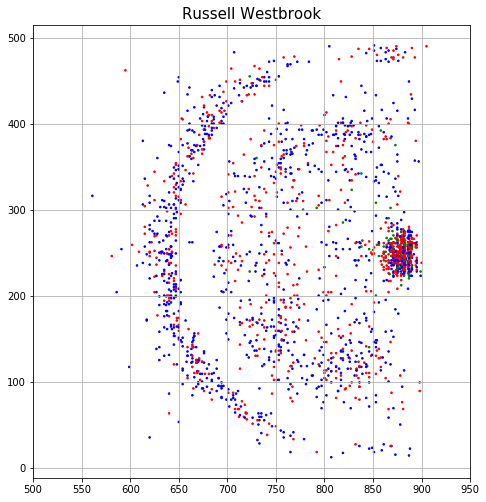

In [10]:
# Westbrook plot

hxW = Westbrook['halfcourt_x']
hyW = Westbrook['halfcourt_y']
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.xlim(500,950)
plt.scatter(hxW,hyW, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Russell Westbrook", fontsize = 15)

Text(0.5, 1.0, 'Kevin Durant')

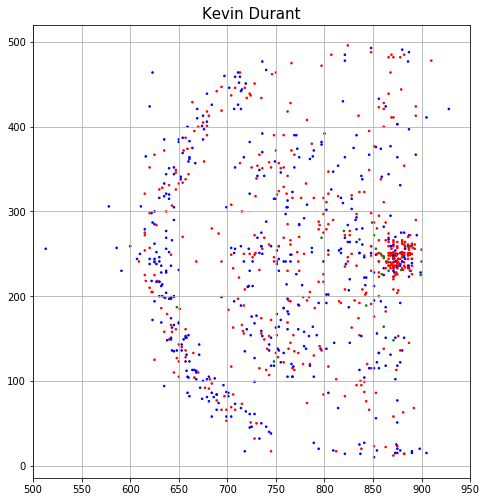

In [11]:
# Durant plot

hxD = Durant['halfcourt_x']
hyD = Durant['halfcourt_y']
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.xlim(500,950)
plt.scatter(hxD,hyD, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Kevin Durant", fontsize = 15)

Text(0.5, 1.0, 'Westbrook')

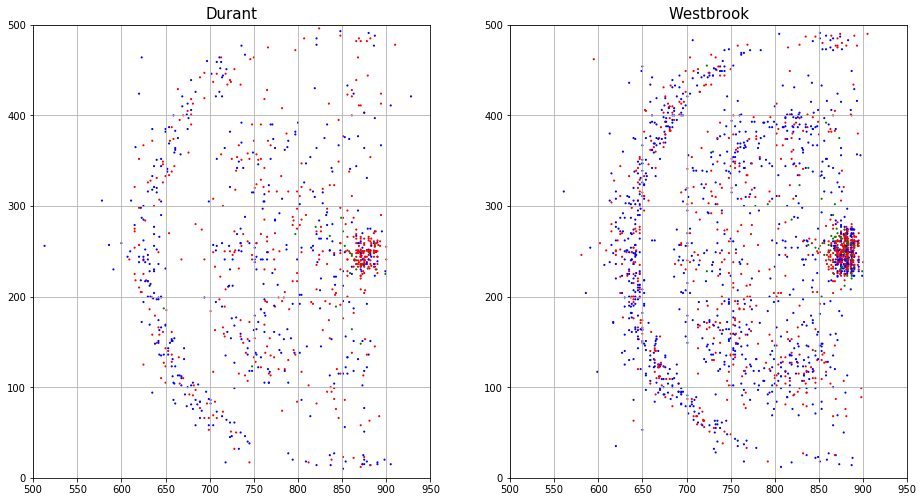

In [12]:
# Russell Westbrook and Kevin Durant side by side

g = plt.figure(figsize=(94/6,50/6))
ax = g.add_subplot(121)
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxD,hyD, s=5, c= colors,marker= '.')
plt.xlim(500,950)
plt.ylim(0,500)
plt.grid(True)
plt.title("Durant", fontsize = 15)
ax = g.add_subplot(122)
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxW,hyW, s=5, c= colors, marker= '.')
plt.xlim(500,950)
plt.ylim(0,500)
plt.grid(True)
plt.title("Westbrook", fontsize = 15)